In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [2]:
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()

### Autoregression AR

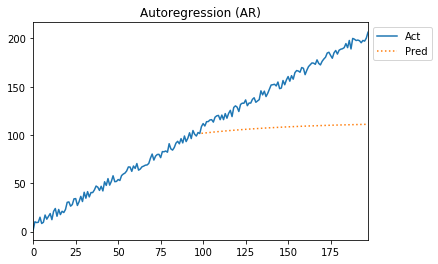

In [4]:
from statsmodels.tsa.ar_model import AutoReg
from random import random

def AR_model(train,test):
    # fit model
    model = AutoReg(train['Act'], lags=1)
    model_fit = model.fit()
    # make prediction
    yhat=model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(1, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 200)],
                     columns=['Act'])
df_ret = AR_model(df_train, df_test)
show_graph(df_train, df_ret, "Autoregression (AR)")

### Moving Average (MA)

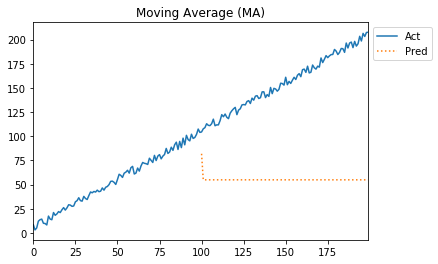

In [5]:
from statsmodels.tsa.arima_model import ARMA
from random import random

def MA_model(train,test):
    # fit model
    model = ARMA(train['Act'], order=(0, 1))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)],
                     columns=['Act'])
df_ret = MA_model(df_train, df_test)
show_graph(df_train, df_ret, "Moving Average (MA)")

### Autoregressive Moving Average (ARMA)

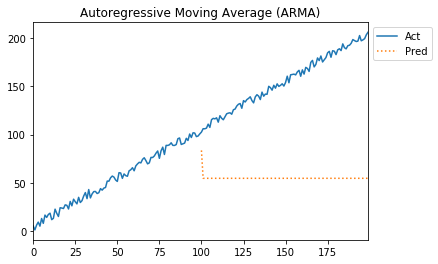

In [8]:
from statsmodels.tsa.arima_model import ARMA
from random import random

def ARMA_model(train,test):
    # fit model
    model = ARMA(train['Act'], order=(0,1,2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)],
                     columns=['Act'])
df_ret = ARMA_model(df_train, df_test)
show_graph(df_train, df_ret, "Autoregressive Moving Average (ARMA)")

### Autoregressive Integrated Moving Average (ARIMA)

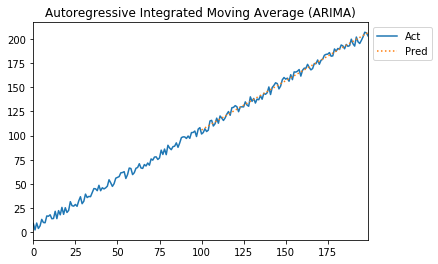

In [9]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

def ARIMA_model(train,test):
    # fit model
    model = ARIMA(train['Act'], order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1, typ='levels')
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)],
                     columns=['Act'])
df_ret = ARIMA_model(df_train, df_test)
show_graph(df_train, df_ret, "Autoregressive Integrated Moving Average (ARIMA)")

### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

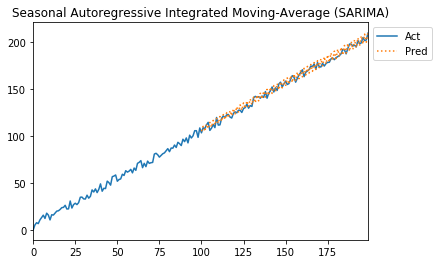

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

def SARIMA_model(train,test):
    # fit model
    model = SARIMAX(train['Act'], order=(1, 1, 1), seasonal_order=(1, 2, 1, 2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)],
                     columns=['Act'])
df_ret = SARIMA_model(df_train, df_test)
show_graph(df_train, df_ret, "Seasonal Autoregressive Integrated Moving-Average (SARIMA)")

### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

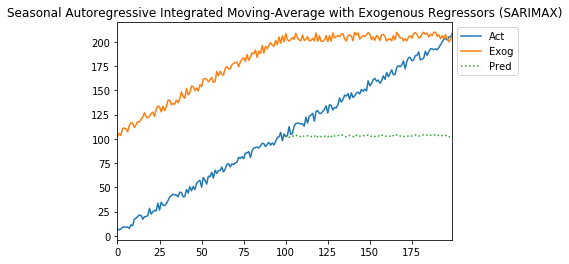

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random

def SARIMAX_model(train,test):
    # fit model
    model = SARIMAX(train.drop('Exog', axis=1), exog=train['Exog'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + len(test) - 1, exog=test["Exog"].values)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values,"Exog":test["Exog"].values})
    return res

df_train = pd.DataFrame({'Act':[x + random()*10 for x in range(0, 100)],
                         'Exog':[x + random()*10 for x in range(101, 201)]})
df_test = pd.DataFrame({'Act':[x + random()*10 for x in range(101, 201)],
                         'Exog':[200 + random()*10 for x in range(201, 301)]})
df_ret = SARIMAX_model(df_train, df_test)
show_graph(df_train, df_ret, "Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)")

### Vector Autoregression (VAR)

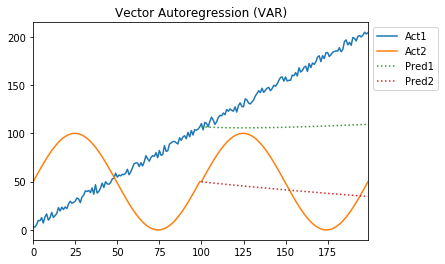

In [26]:
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

def VAR_model(train,test):
    # fit model
    model = VAR(train)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.forecast(model_fit.y, steps=len(test))
#    print(yhat)
    res=pd.DataFrame({"Pred1":[x[0] for x in yhat], "Pred2":[x[1] for x in yhat], 
                      "Act1":test["Act1"].values, "Act2":test["Act2"].values})
    return res

df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
                         'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
                         'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret = VAR_model(df_train, df_test)
show_graph(df_train, df_ret, "Vector Autoregression (VAR)")

### Vector Autoregression Moving-Average (VARMA)

C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


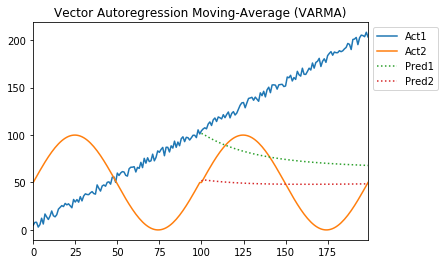

In [3]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

def VARMA_model(train,test):
    # fit model
    model = VARMAX(train, order=(1, 2))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.forecast(steps=len(test))
    res=pd.DataFrame({"Pred1":yhat['Act1'], "Pred2":yhat['Act2'], 
                      "Act1":test["Act1"].values, "Act2":test["Act2"].values})
    return res

df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
                         'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
                         'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret = VARMA_model(df_train, df_test)
show_graph(df_train, df_ret, "Vector Autoregression Moving-Average (VARMA)")

### Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)

C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


           Act1        Act2
100  104.861717  304.292044
101  105.697217  303.491128
102  105.377763  302.877417
103  105.225697  302.230557
104  105.046605  301.583076
105  104.868919  300.930382
106  104.688347  300.273368
107  104.505416  299.612155
108  104.319962  298.947005
109  104.131939  298.278192
110  103.941296  297.606014
111  103.748002  296.930792
112  103.552037  296.252870
113  103.353395  295.572613
114  103.152084  294.890401
115  102.948128  294.206636
116  102.741562  293.521732
117  102.532435  292.836119
118  102.320812  292.150239
119  102.106768  291.464542
120  101.890393  290.779490
121  101.671788  290.095549
122  101.451067  289.413191
123  101.228356  288.732889
124  101.003790  288.055119
125  100.777516  287.380354
126  100.549692  286.709065
127  100.320483  286.041718
128  100.090063  285.378770
129   99.858615  284.720672
..          ...         ...
170   91.808158  264.624551
171   91.683264  264.281725
172   91.561797  263.941164
173   91.443620  263

C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


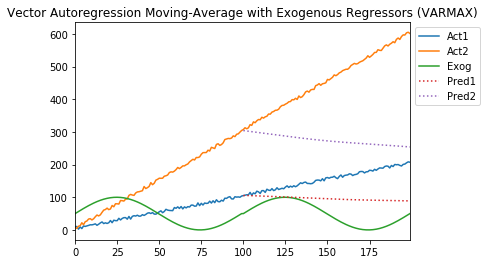

In [27]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random

def VARMAX_model(train,test):
    # fit model
    model = VARMAX(train.drop('Exog', axis=1), exog=train['Exog'], order=(1, 1))
    model_fit = model.fit(disp=False)
    # make prediction
    yhat = model_fit.forecast(steps=len(test),exog=test['Exog'])
    print(yhat)
    res=pd.DataFrame({"Pred1":yhat['Act1'], "Pred2":yhat['Act2'], 
            "Act1":test["Act1"].values, "Act2":test["Act2"].values, "Exog":test["Exog"].values})
    return res

df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
                         'Act2':[x*3 + random()*10 for x in range(0, 100)],
                         'Exog':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
                         'Act2':[x*3 + random()*10 for x in range(101, 201)],
                         'Exog':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret = VARMAX_model(df_train, df_test)
show_graph(df_train, df_ret,"Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)")

### Simple Exponential Smoothing (SES)

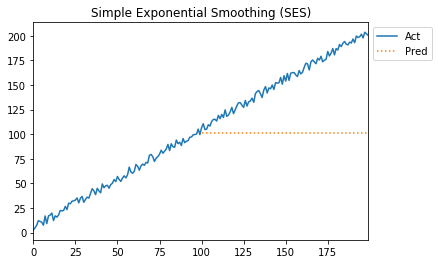

In [21]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random

def SES_model(train,test):
    # fit model
    model = SimpleExpSmoothing(train['Act'])
    model_fit = model.fit()
    # make prediction
    yhat=model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)],
                     columns=['Act'])
df_ret = SES_model(df_train, df_test)
show_graph(df_train, df_ret,"Simple Exponential Smoothing (SES)")

### Holt Winter’s Exponential Smoothing (HWES)

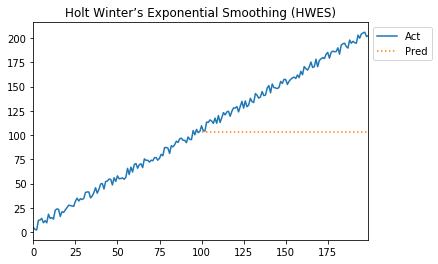

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random

def HWES_model(train,test):
    # fit model
    model = ExponentialSmoothing(train['Act'])
    model_fit = model.fit()
    # make prediction
    yhat=model_fit.predict(len(train), len(train) + len(test) - 1)
    res=pd.DataFrame({"Pred":yhat, "Act":test["Act"].values})
    return res
 
df_train = pd.DataFrame([x + random()*10 for x in range(0, 100)],
                     columns=['Act'])
df_test = pd.DataFrame([x + random()*10 for x in range(101, 201)],
                     columns=['Act'])
df_ret = HWES_model(df_train, df_test)
show_graph(df_train, df_ret, "Holt Winter’s Exponential Smoothing (HWES)")